In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [95]:
df = pd.read_csv(
    "/Users/dickinsonjo/repos/CollegePriceTransparency/data/InstitutionData2020-2021.csv"
)
df.head(3)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_8336/1763566676.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


# Columns for analysis

1. UNITID
2. INSTNM
3. CITY
4. STABBR
5. ZIP
6. SCH_DEG
7. PREDDEG
8. HIGHDEG
9. CONTROL
10. REGION
11. COSTT4_A
12. TUITION_IN
13. NPT4_PUB & NPT4_PRIV
14. TUITFTE
15. INEXPFTE
16. AVGFACSAL
17. LOCALE
18. LOCALE2

In [96]:
df_cleaned = df[
    [
        "UNITID",
        "INSTNM",
        "CITY",
        "STABBR",
        "ZIP",
        "PREDDEG",
        "HIGHDEG",
        "CONTROL",
        "REGION",
        "COSTT4_A",
        "TUITIONFEE_IN",
        "TUITIONFEE_OUT",
        "TUITFTE",
        "INEXPFTE",
        "AVGFACSAL",
        "LOCALE",
    ]
]

In [97]:
df_cleaned.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
PREDDEG              0
HIGHDEG              0
CONTROL              0
REGION               0
COSTT4_A          3240
TUITIONFEE_IN     2756
TUITIONFEE_OUT    2756
TUITFTE            519
INEXPFTE           519
AVGFACSAL         2643
LOCALE             497
dtype: int64

In [98]:
total = df_cleaned.shape[0]
total

6543

In [99]:
df_cleaned.isna().sum() / total * 100

UNITID             0.000000
INSTNM             0.000000
CITY               0.000000
STABBR             0.000000
ZIP                0.000000
PREDDEG            0.000000
HIGHDEG            0.000000
CONTROL            0.000000
REGION             0.000000
COSTT4_A          49.518569
TUITIONFEE_IN     42.121351
TUITIONFEE_OUT    42.121351
TUITFTE            7.932141
INEXPFTE           7.932141
AVGFACSAL         40.394315
LOCALE             7.595904
dtype: float64

"Highest degree awarded
 0 Non-degree-granting
 1 Certificate degree
 2 Associate degree
 3 Bachelor's degree
 4 Graduate degree"

Algo:
1. Remove HIGHDEG 0 & 1.
2. Grab all zip codes.
3. Subset the data by zip code.
4. Impute missing values with median of that zip code.

In [100]:
# drop institutions that dont offer AA or higher
degrees = [2, 3, 4]
df_cleaned = df_cleaned[df_cleaned["HIGHDEG"].isin(degrees)]

In [101]:
# Check to see if degrees are present
df_cleaned["HIGHDEG"].unique()

array([4, 2, 3])

In [102]:
# drop 0, and 9 regions
regions = list(range(1,9))
df_cleaned = df_cleaned[df_cleaned['REGION'].isin(regions)]

# Grab finance data

In [103]:
finance_df = df_cleaned[[
    "UNITID",
    "COSTT4_A",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "TUITFTE",
    "INEXPFTE",
    "AVGFACSAL"
]]

# Impute missing values using Iterative Imputer

Algorithm:

1. Remove all null values
2. Create random null values proportional to full dataset
3. Impute random null values
4. Test imputation with:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

5. Generate Figures:
- Boxplot
- Histogram
- Scatterplot

**Will use iterative imputer if MAE is < $10,000**

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
test_df = finance_df.copy()

In [106]:
columns_to_impute = test_df.columns[1:]

# Get proporition of nulls
nulls = test_df.isna().sum()[1:]
proportion_of_nulls = round(nulls / len(test_df), 3)
proportion_list = list(proportion_of_nulls)

# Convert to dictionary
proportion_dict = dict(zip(columns_to_impute, proportion_list))

In [107]:
# Remove all nulls
test_df_clean = test_df.iloc[:, 1:].dropna(how="any")
test_df_clean.reset_index(drop=True, inplace=True)
test_df_to_impute = test_df_clean.copy()

for key in proportion_dict.keys():
    # get number of nulls
    num_null = int(len(test_df_to_impute) * proportion_dict[key])

    # randomly select indices
    null_indices = np.random.choice(test_df_to_impute.index, num_null, replace=False)

    # assign null vals to that column
    test_df_to_impute.loc[null_indices, key] = np.nan



In [108]:
imputation = IterativeImputer(random_state=0, max_iter=20)
imputed_test_df = imputation.fit_transform(test_df_to_impute)
test_df_imputed = pd.DataFrame(imputed_test_df, columns=columns_to_impute)
test_df_imputed.head(3)

/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
0,21924.000000,10024.0,18634.0,9243.0,7699.0,8779.0
1,26248.000000,8568.0,20400.0,11678.0,14264.0,11590.0
2,23363.023103,11488.0,23884.0,8246.0,8156.0,9820.0


In [109]:
test_df_imputed = round(test_df_imputed, 2)


In [110]:
error_dict = {}

for col in columns_to_impute:
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Mean absolute
    mae = mean_absolute_error(true_value_col, imputed_data_col)

    # Mean squared error
    mse = mean_squared_error(true_value_col, imputed_data_col)

    rmse = np.sqrt(mse)

    # save in df
    error_dict[col] = [mae, mse, rmse]

In [111]:
error_df = pd.DataFrame(error_dict)
error_df = error_df.apply(np.round)
error_df.index = ["mae", "mse", "rmse"]
error_df

,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
mae,3304.0,2604.0,3284.0,5038.0,1762.0,1433.0
mse,22324962.0,14886226.0,20781923.0,48477446.0,4630702.0,3318383.0
rmse,4725.0,3858.0,4559.0,6963.0,2152.0,1822.0


## Visualizations

We will create the following visualizations to assess the predictions

1. Boxplot
2. Histograms
3. Scatterplots

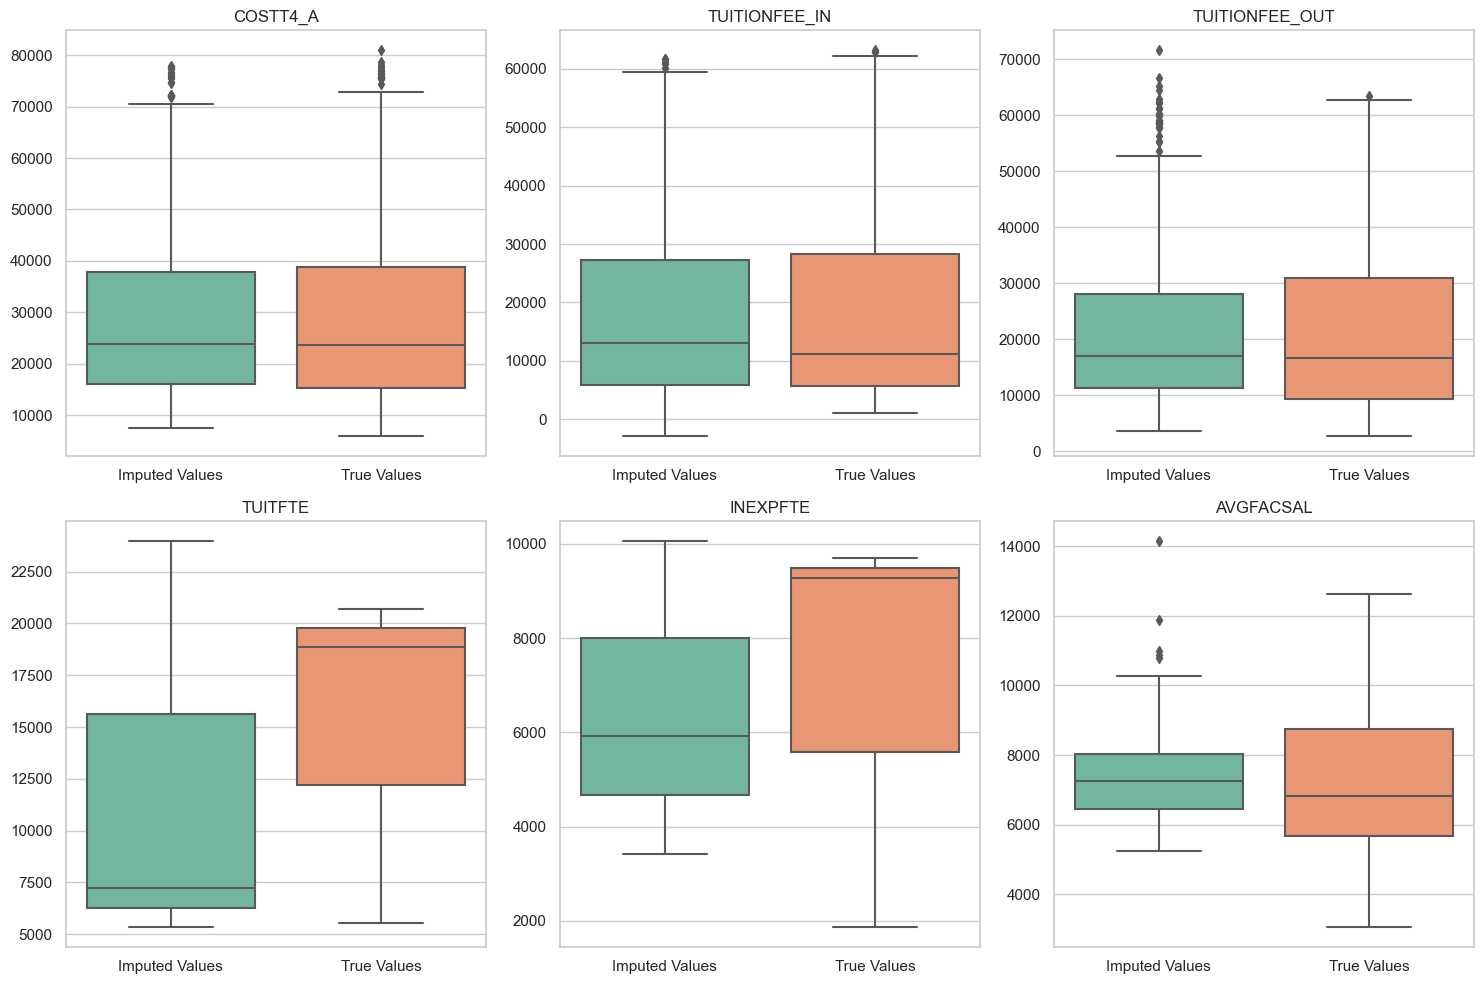

In [112]:
sns.set(style="whitegrid")

# Determine number of rows and columns for the grid
n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

# generate figures
for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create a DataFrame for boxplot
    data_to_plot = pd.DataFrame(
        {"Imputed Values": imputed_data_col, "True Values": true_value_col}
    )

    # Create boxplot
    sns.boxplot(ax=axs[idx], data=data_to_plot, palette="Set2")
    axs[idx].set_title(col)

# Remove any unused subplots
for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

# Make layout tighter
plt.tight_layout()
plt.show()

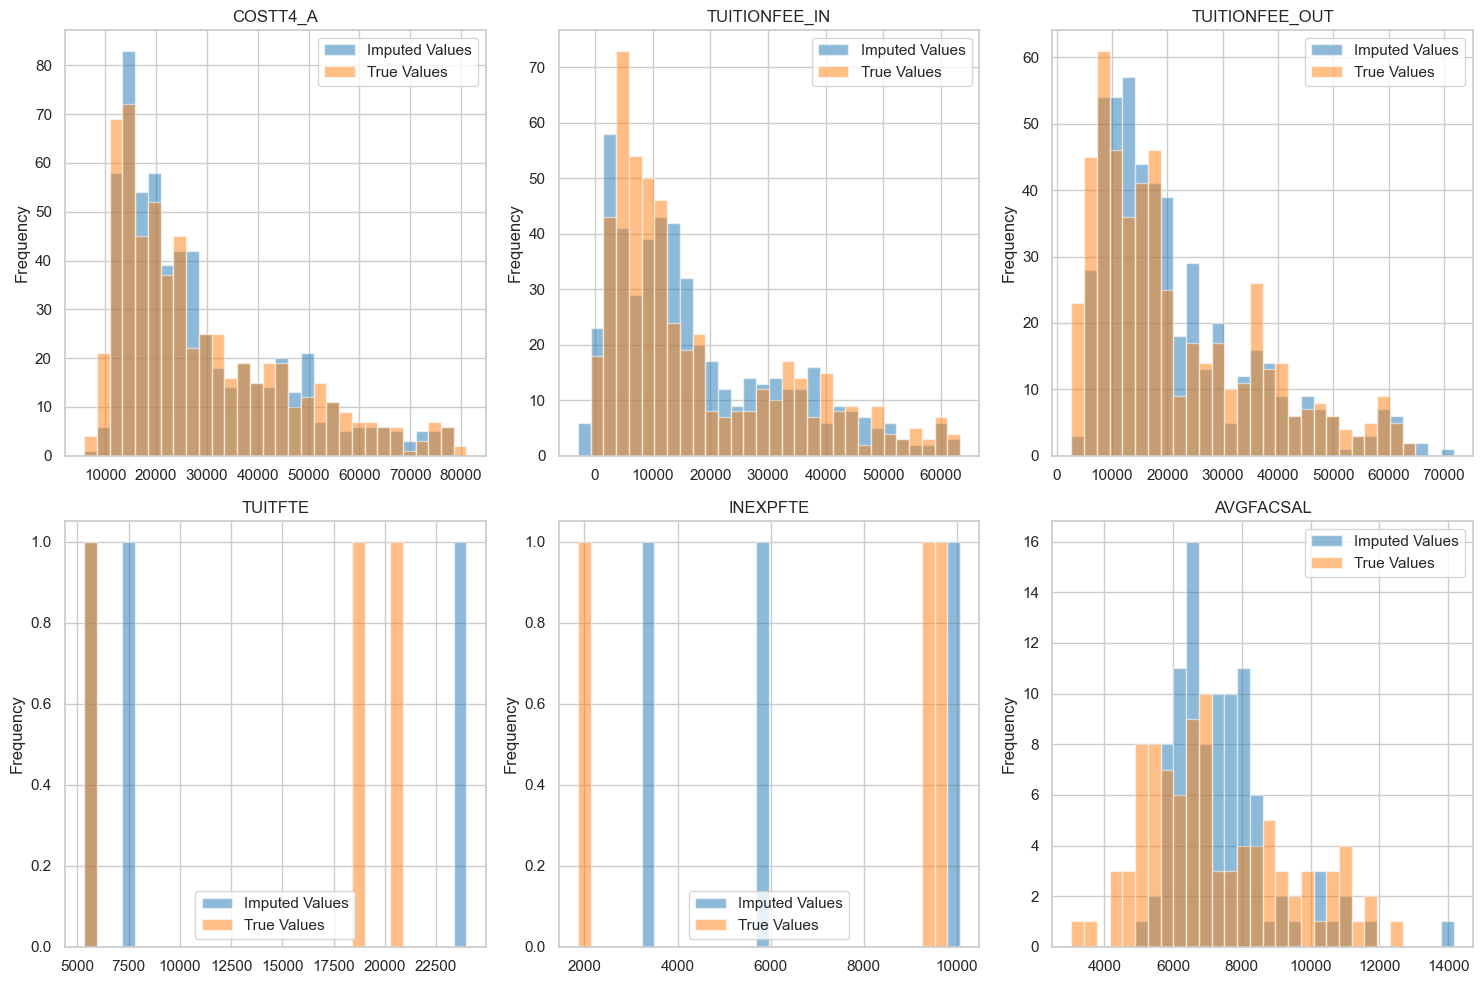

In [113]:
# Grid of Histograms
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create a DataFrame for histogram
    data_to_plot = pd.DataFrame(
        {"Imputed Values": imputed_data_col, "True Values": true_value_col}
    )

    # Create histogram
    data_to_plot.plot(
        kind="hist", ax=axs[idx], bins=30, alpha=0.5, color=["#1f77b4", "#ff7f0e"]
    )
    axs[idx].set_title(col)

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

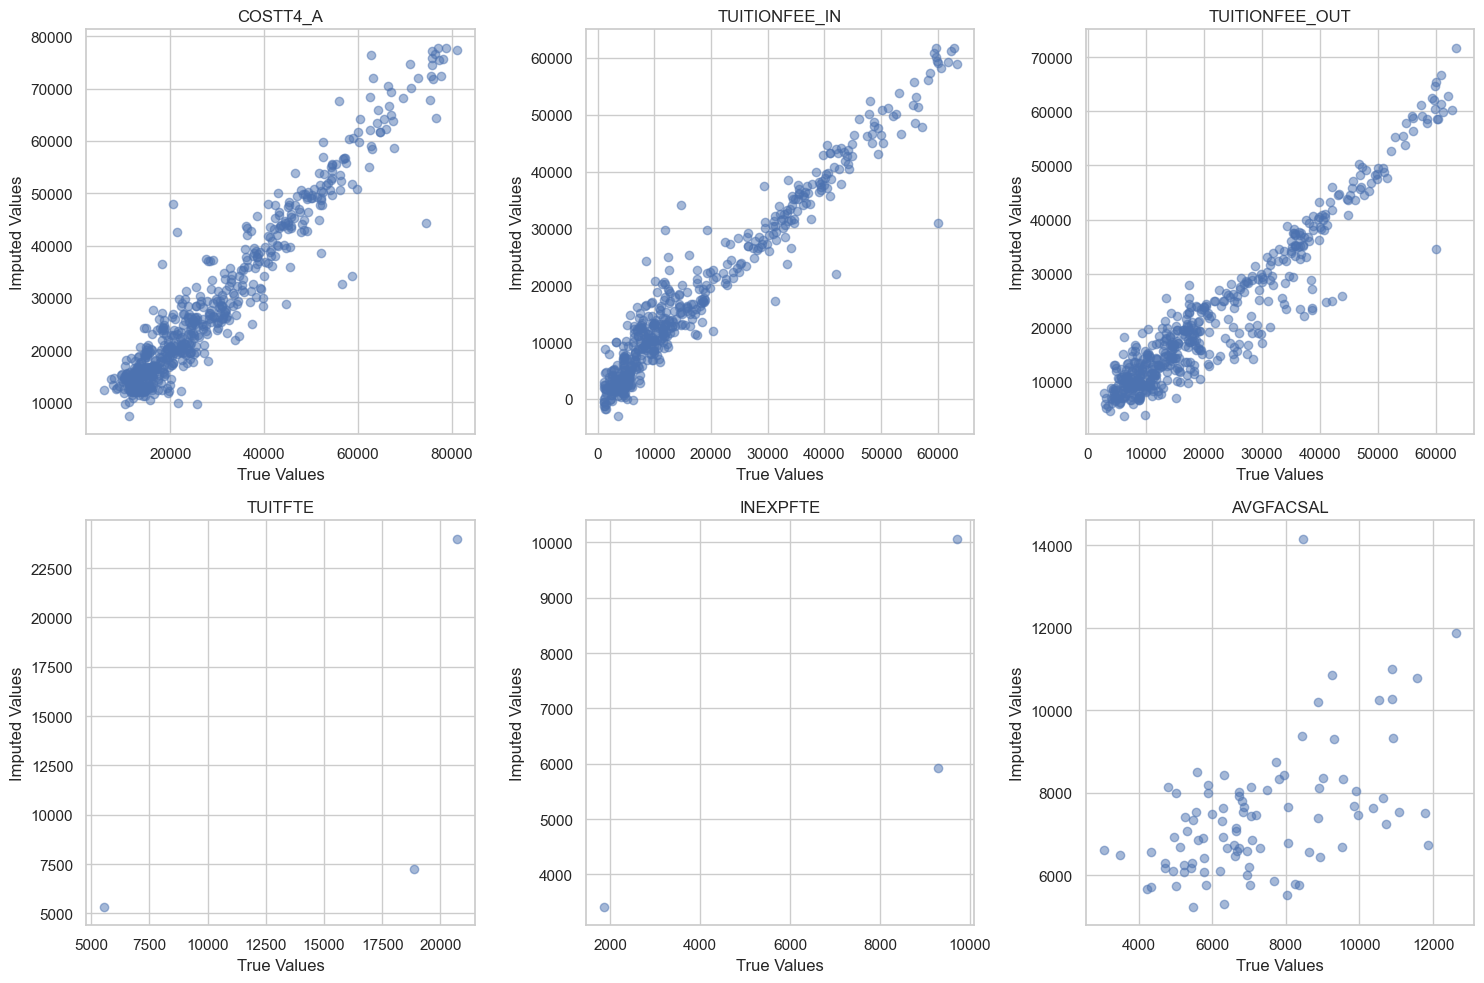

In [114]:
# Grid of Scatterplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create scatterplot
    axs[idx].scatter(true_value_col, imputed_data_col, alpha=0.5)
    axs[idx].set_title(col)
    axs[idx].set_xlabel("True Values")
    axs[idx].set_ylabel("Imputed Values")

for idx in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [115]:
# impute values on full dataset
X = df_cleaned.loc[:, "COSTT4_A":"AVGFACSAL"]
imputed_finance_data = imputation.fit_transform(X=X)
imputed_finance_data = pd.DataFrame(imputed_finance_data, columns=X.columns)
imputed_finance_data = imputed_finance_data.apply(np.round)

/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [116]:
final_df = imputed_finance_data.merge(
    df_cleaned[
        [
            "UNITID",
            "INSTNM",
            "CITY",
            "STABBR",
            "ZIP",
            "PREDDEG",
            "HIGHDEG",
            "CONTROL",
            "REGION",
            "LOCALE",
        ]
    ],
    left_index=True,
    right_index=True,
)

In [117]:
final_df.head()

,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,UNITID,INSTNM,CITY,STABBR,ZIP,PREDDEG,HIGHDEG,CONTROL,REGION,LOCALE
0,21924.0,10024.0,18634.0,9243.0,7699.0,8779.0,100654,Alabama A & M University,Normal,AL,35762,3,4,1,5,12.0
1,26248.0,8568.0,20400.0,11678.0,14264.0,11590.0,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3,4,1,5,12.0
2,29196.0,17804.0,17913.0,14093.0,4381.0,4672.0,100690,Amridge University,Montgomery,AL,36117-3553,3,4,2,5,12.0
3,24869.0,11488.0,23884.0,8246.0,8156.0,9820.0,100706,University of Alabama in Huntsville,Huntsville,AL,35899,3,4,1,5,12.0
4,21938.0,11068.0,19396.0,8535.0,9459.0,7701.0,100724,Alabama State University,Montgomery,AL,36104-0271,3,4,1,5,12.0


In [118]:
final_df.to_csv("CleanInstitutionalData.csv", index=False)